# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#OpenWeather Key
api_key = weather_api_key
units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=632bef0b951137f086df74071753c3bf&units=imperial&q=


In [ ]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | ekhabi
Processing Record 2 of Set 1 | atuona
City not found. Skipping...
Processing Record 3 of Set 1 | mackay
Processing Record 4 of Set 1 | port hardy
City not found. Skipping...
City not found. Skipping...
Processing Record 5 of Set 1 | salalah
Processing Record 6 of Set 1 | winslow
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | fortuna
City not found. Skipping...
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | macon
Processing Record 12 of Set 1 | luderitz
Processing Record 13 of Set 1 | bay roberts
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | antofagasta
City not found. Skipping...
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | jamestown
City not found. Skipping...
Processing Record 21 of Set 1 | dik

Processing Record 39 of Set 4 | gushikawa
Processing Record 40 of Set 4 | padang
Processing Record 41 of Set 4 | sung noen
Processing Record 42 of Set 4 | marabba
Processing Record 43 of Set 4 | dudinka
Processing Record 44 of Set 4 | bastia
Processing Record 45 of Set 4 | mount gambier
Processing Record 46 of Set 4 | garowe
Processing Record 47 of Set 4 | novelda
Processing Record 48 of Set 4 | yerbogachen
Processing Record 49 of Set 4 | arraial do cabo
Processing Record 1 of Set 5 | meulaboh
Processing Record 2 of Set 5 | bethel
Processing Record 3 of Set 5 | vila velha
City not found. Skipping...
Processing Record 4 of Set 5 | aitape
City not found. Skipping...
Processing Record 5 of Set 5 | kenai
Processing Record 6 of Set 5 | singur
Processing Record 7 of Set 5 | belaya gora
Processing Record 8 of Set 5 | acajutiba
Processing Record 9 of Set 5 | dera din panah
Processing Record 10 of Set 5 | mehriz
Processing Record 11 of Set 5 | qixia
Processing Record 12 of Set 5 | lander
Proces

Processing Record 27 of Set 8 | vwawa
Processing Record 28 of Set 8 | kloulklubed
Processing Record 29 of Set 8 | kyabram
Processing Record 30 of Set 8 | mwinilunga
Processing Record 31 of Set 8 | thetford mines
Processing Record 32 of Set 8 | ouro branco
Processing Record 33 of Set 8 | namibe
Processing Record 34 of Set 8 | yumen
Processing Record 35 of Set 8 | paracuru
Processing Record 36 of Set 8 | otane
Processing Record 37 of Set 8 | hervey bay
Processing Record 38 of Set 8 | sakakah
Processing Record 39 of Set 8 | harper
Processing Record 40 of Set 8 | hamilton
Processing Record 41 of Set 8 | bonito
City not found. Skipping...
Processing Record 42 of Set 8 | torbay
Processing Record 43 of Set 8 | coquimbo
Processing Record 44 of Set 8 | riyadh
Processing Record 45 of Set 8 | marapanim
Processing Record 46 of Set 8 | warud
Processing Record 47 of Set 8 | sinnamary
Processing Record 48 of Set 8 | naples
Processing Record 49 of Set 8 | araxa
Processing Record 1 of Set 9 | sambava
C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
weather_dict = {
    "City": city_two,
    "Cloudiness": cloudinesses,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
}

In [ ]:
# Save the result into cities.csv file
output_data_file = "output_data/cities.csv"

In [ ]:
weather_dataframe = pd.DataFrame(weather_dict)

# show the top of the dataframe
weather_dataframe.head(10)

In [ ]:
# Exporting to CSV

weather_dataframe.to_csv("cities.csv")

In [ ]:
# Checking New DataFrame & Cleaning the Data

weather_data = pd.read_csv("cities.csv")
weather_df2 = weather_data.drop(columns=["Unnamed: 0"])
weather_df2.head(5)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

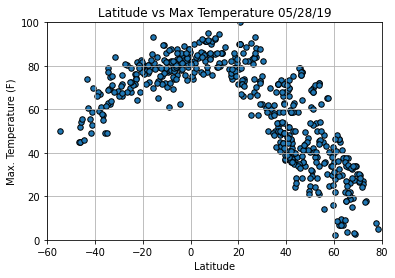

In [11]:
#Create a Scatter Plot for Lattitude vs Temperature of City

plt.scatter(weather_dataframe["Lat"], weather_dataframe["Max Temp"], marker='o',s=30, edgecolors= "black")
#my_time = time.strptime(05/28/19 "%m/%d/%y")
plt.title("Latitude vs Max Temperature 05/28/19")

plt.ylim(0,100)
plt.xlim(-60, 80)

plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('Fig1.png')


#### Latitude vs. Humidity Plot

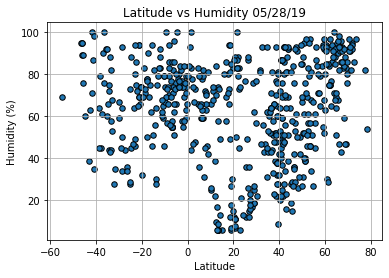

In [12]:
#create a Scatter Plot for Lattitude vs Humidity

plt.scatter(weather_dataframe["Lat"], weather_dataframe["Humidity"], marker='o', s=30, edgecolors= "black")
plt.title("Latitude vs Humidity 05/28/19")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig('Fig2.png')
# plt.show()

#### Latitude vs. Cloudiness Plot

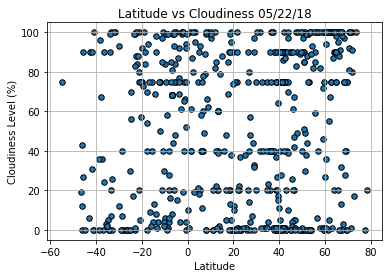

In [13]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Cloudiness"], marker='o', s=30, edgecolors= "black")
plt.title("Latitude vs Cloudiness 05/22/18")
plt.ylabel("Cloudiness Level (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig('Fig3.png')
# plt.show()

#### Latitude vs. Wind Speed Plot

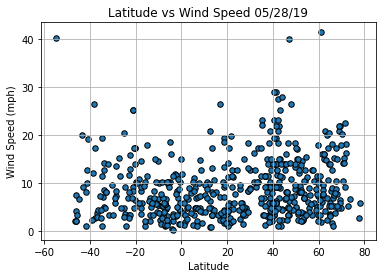

In [14]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind Speed"], marker='o', s=30, edgecolors= "black")
plt.title("Latitude vs Wind Speed 05/28/19")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('Fig4.png')

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots


In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"]>0.01]
southern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"]<-0.01]

# northern_hemisphere.head()
southern_hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
9,rikitea,99,PF,1586529184,80,-23.12,-134.97,76.46,11.72
12,mataura,12,NZ,1586529184,95,-46.19,168.86,45.00,1.99
13,hobart,90,AU,1586529185,63,-42.88,147.33,60.80,9.17
19,avarua,100,CK,1586529186,94,-21.21,-159.78,78.80,9.17
21,urucara,99,BR,1586529186,58,-2.54,-57.76,89.13,3.18


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

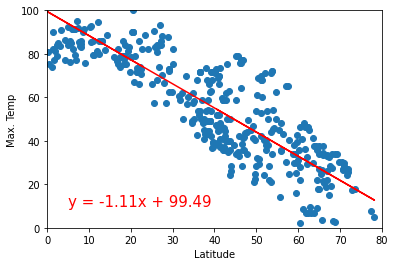

In [17]:
#Create a Scatter Plot for Lattitude vs Temperature of City
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

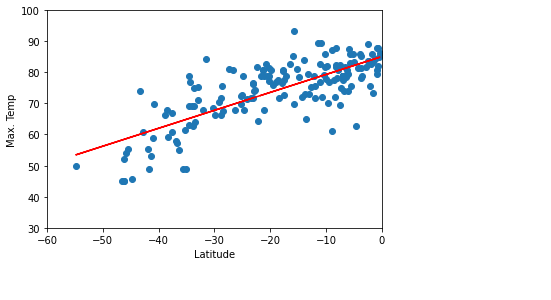

In [18]:
#Create a Scatter Plot for Lattitude vs Temperature of City (Southern Hemisphere)
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.ylim(30, 100)
plt.xlim(-60, 0, 10)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

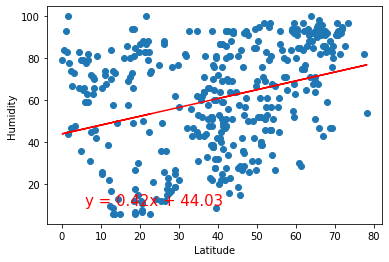

In [19]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

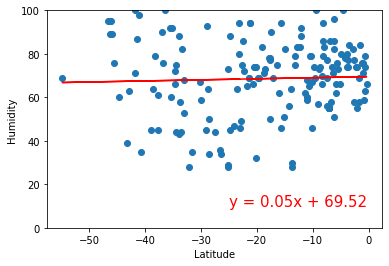

In [20]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.ylim(0, 100)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

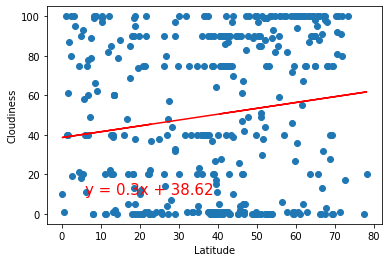

In [21]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

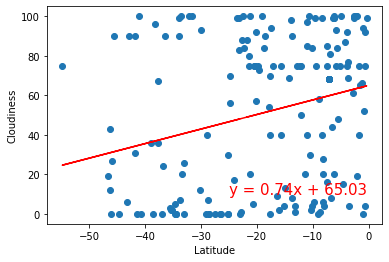

In [22]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

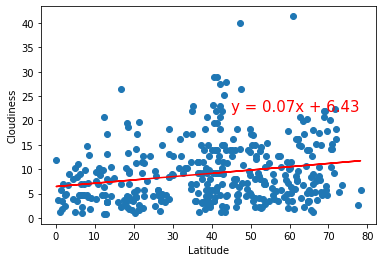

In [23]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,22),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

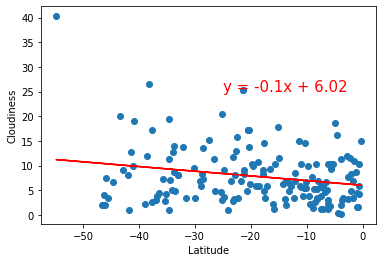

In [24]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

